<a href="https://colab.research.google.com/github/mkrajevsky/NLP_guzman/blob/main/Micha%C5%82_Krajewski_08_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#$\textbf{Convolutional Neural Network}$
---

$\textbf{Import libraries}$

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import os
import random
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive
Mounted at /content/drive


$\textbf{Convolutional Neural Network} \color{blue}{\textbf{ class }}$

In [ ]:
class Simple_CNN_Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.convolution_layer = tf.keras.layers.Conv2D(filters=2, kernel_size=(3,3))
        self.pooling_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2))
        self.mlp_flatten_layer = tf.keras.layers.Flatten()
        self.mlp_output_layer = tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)

    def call(self, inputs):
        x = self.convolution_layer(inputs)
        x = self.pooling_layer(x)
        x = self.mlp_flatten_layer(x)
        return self.mlp_output_layer(x)

In [ ]:
class Convolutional_Neural_Network:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.model = Simple_CNN_Model()

    # train the model
    def train(self, LR, epochs, validation_split=None):
        self.model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=LR),
                           loss=tf.keras.losses.CategoricalCrossentropy(),
                           metrics=['accuracy'])
        self.loss_acc = self.model.fit(self.X, self.Y, epochs=epochs, verbose=0, validation_split=validation_split)

    # plot loss and accuracy history
    def plot_loss_accuracy(self):
        fig = plt.figure(figsize=(8, 4))
        fig.suptitle('Log Loss and Accuracy over Epochs')
        labels = ['Training', 'Validation']

        # get training history to plot
        loss = self.loss_acc.history.get('loss')
        val_loss = self.loss_acc.history.get('val_loss')
        accuracy = self.loss_acc.history.get('accuracy')
        val_accuracy = self.loss_acc.history.get('val_accuracy')

        # add_subplot(nrows, ncolumns, index)
        ax = fig.add_subplot(1, 2, 1)
        ax.plot(loss, label=labels[0])
        if val_loss:
            ax.plot(val_loss, label=labels[1])
        ax.grid(True)
        ax.set(xlabel='Epochs', title='Log Loss')
        ax.legend(loc='upper right')

        ax = fig.add_subplot(1, 2, 2)
        ax.plot(accuracy, label=labels[0])
        if val_accuracy:
            ax.plot(val_accuracy, label=labels[1])
        ax.grid(True)
        ax.set(xlabel='Epochs', title='Accuracy')
        ax.legend(loc='lower right')

#$\color{blue} {\textbf{Softmax}}$

$\textbf{Softmax Classifier}$

Softmax classifier works by assigning a probability distribution to each category

In [ ]:
# Categorical Classifier Example
# input ('O' and 'X' encoding)
X = np.array([[1,0,0,1,0,1,1,0],
              [0,1,1,0,1,0,0,1]])

# label/category ('O' and 'X')
Y = np.array([[1,0],
              [0,1]])

# model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax, input_dim=8))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                           loss=tf.keras.losses.CategoricalCrossentropy(),
                           metrics=['accuracy'])
model.fit(X, Y, epochs=100, verbose=0)
res = model.predict(X, verbose=0)
print(res)
print(np.round(res))

[[0.5646228  0.43537718]
 [0.28687397 0.713126  ]]
[[1. 0.]
 [0. 1.]]


$\textbf{Step by step}$

In [ ]:
# retrieve weights
W = model.layers[0].get_weights()[0]
B  = model.layers[0].get_weights()[1]
print(f'W={np.round(W, decimals=2)}')
print(f'B={np.round(B, decimals=2)}')

W=[[-0.21 -1.05]
 [-0.08 -0.4 ]
 [-0.46 -0.51]
 [-0.16  0.37]
 [-0.88  0.41]
 [ 0.04  0.31]
 [-0.08 -0.02]
 [-0.56 -0.28]]
B=[ 0.14 -0.14]


In [ ]:
# softmax function
def softmax(z):
    return np.exp(z) / sum(np.exp(z))

In [ ]:
# compute output (y_hat)
z = np.dot(X, W) + B
y_hat = np.array([softmax(z[0]), softmax(z[1])])
print(y_hat)

[[0.56462283 0.43537717]
 [0.28687398 0.71312602]]


#$\color{red} {\textbf{Image Preprocessing}}$

$\textbf{Mount the drive and change the directory}$

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

# change directory
%cd 'drive/MyDrive/Classroom/Introduction to Deep Learning for NLP (2024)'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Classroom/Introduction to Deep Learning for NLP (2024)


$\textbf{How to load and transform images?}$

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=522x722 at 0x7B36AAE19030>


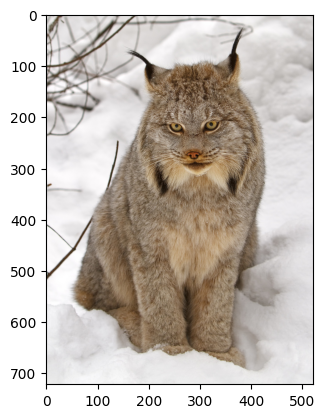

In [ ]:
# QUICK EXAMPLE
# Load and show an image
lynx = tf.keras.preprocessing.image.load_img('lynx.jpg')
print(lynx) # <- show image info
plt.imshow(lynx) # <- show image

<PIL.Image.Image image mode=L size=100x140 at 0x7B361D8FC4C0>


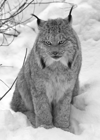

In [ ]:
# Image transformation
t_lynx = lynx.resize((100, 140)).convert(mode='L')
print(t_lynx)
t_lynx
# plt.imshow(t_lynx, cmap='gray')

$\textbf{Load Images}$

In [ ]:
# list a directory and get the subfolders (image categories) as a 'list' of 'str'
# to build a 'dictionary' to store images ordered by category

folder = 'xo_dataset'
images = {c: [] for c in os.listdir(folder)}
images

{'X': [], 'O': []}

In [ ]:
for c in os.scandir(folder):
    for img_file in os.scandir(c.path):
        img = tf.keras.preprocessing.image.load_img(img_file.path)
        images[c.name].append(img)

images

{'X': [<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900>,
  <PI

$\textbf{Show Images}$

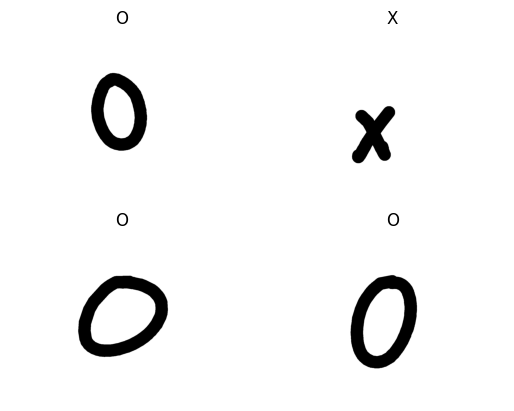

In [ ]:
# Show 4 (random) sample images
categories = ['O', 'X']
for i in range(4):
    cat = random.choice(categories)
    img = random.choice(images[cat])
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(cat)
    plt.axis("off")

$\textbf{Image Modes and Rescaling}$

In [ ]:
sample = images['X'][1]
print(sample)
# sample

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7B3614312080>


In [ ]:
# image mode
sample.getbands()

('R', 'G', 'B')

In [ ]:
# convert image to grayscale
gs_sample = sample.convert('L')
gs_sample.getbands()
print(gs_sample)

<PIL.Image.Image image mode=L size=1200x900 at 0x7B3614313580>


<PIL.Image.Image image mode=RGB size=120x90 at 0x7B36140B4670>
(120, 90)


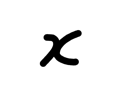

In [ ]:
# resize image
width = round(1200*0.1)
height= round(900*0.1)
small_sample = sample.resize((width, height))
print(small_sample)
print(small_sample.size)
small_sample

$\textbf{Image to NumPy array and Normalization}$

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
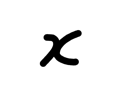

In [ ]:
x = np.array(small_sample)
x

In [ ]:
# resize, convert to grayscale and normalize image
x = np.round(np.array(sample.resize((width, height)).convert('L')) / 255)
print(x.shape)
x

(90, 120)


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

$\textbf{Final Encoding for the Neural Model (Inputs X and Labels Y)}$

In [ ]:
# Sorted list of categories (Labels)
categories = ['O', 'X']
height = 90
width = 120
X = []
Y = []
for c, list_img in images.items():
    for img in list_img:
        x = np.array(img.resize((width, height)).convert('L')) / 255
        X.append(x)
        Y.append(categories.index(c))

# X final shape = (N, height, width, channels)
X = np.array(X).reshape(-1, height, width, 1)
# Y final shape = (N, <number of categories>)
Y = tf.keras.utils.to_categorical(Y, 2) # <- one-hot encoding

In [ ]:
print(X.shape)
print(Y.shape)

(110, 90, 120, 1)
(110, 2)


In [ ]:
 #peek the encoded data
print(X[0])
print(Y[0])

[[[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 ...

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]]
[0. 1.]


$\textbf{Train Test Split}$

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

#$\textbf{Main}$
---

$\textbf{Train model}$

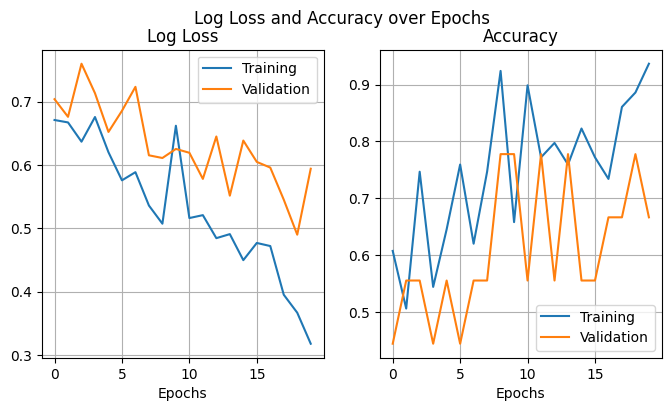

In [ ]:
# define a feedforward neural network
cnn = Convolutional_Neural_Network(X_train, Y_train)
# training process
cnn.train(LR=0.006, epochs=20, validation_split=0.1)
# plot error/accuracy history
cnn.plot_loss_accuracy()

$\textbf{Test model}$

In [ ]:
# test (unseen) data
loss, accuracy = cnn.model.evaluate(X_test, Y_test, verbose=0)
accuracy

InvalidArgumentError: Graph execution error:

Detected at node simple_cnn__model/dense_1/BiasAdd defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-66-53ddf5541c43>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "<ipython-input-3-ac1d7dd17453>", line 13, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py", line 252, in call

Matrix size-incompatible: In[0]: [22,21182], In[1]: [5192,2]
	 [[{{node simple_cnn__model/dense_1/BiasAdd}}]] [Op:__inference_test_function_31571]

In [ ]:
class Images_Dataset:
     def __init__(self, folder):
         self.categories = ["O","X"]
         self.images = {c: [f for f in os.scandir(c.path)] for c in os.scandir(folder)}
         self.imgs = {c:[] for c in self.categories}

     def load_images(self, folder):
         '''
         Input: The name of a folder that contains subfolders (named after each image category)
         Output: A dictionary of 'key:value' pairs where 'key' is a category and 'value' a list of images,
                 e.g., {'O':[O_img1, O_img2, ...], 'X':[X_img1, X_img2, ...]}
         '''
         preprocessed = {k: [tf.keras.preprocessing.image.load_img(f.path) for f in self.images[k]] for k in self.images.keys()}
         self._preprocessed = {c: [tf.keras.preprocessing.image.load_img(f.path) for f in os.scandir(f"{folder}/{c}")] for c in self.categories}
         return preprocessed



     def get_encoded_images(self, height, width, test_size=0.2):
         '''
         Encodes every image as a numpy array, change the size,
         convert to 1 channel mode (grayscale) and normalize it (x/255)
         Output: (X_train, X_test, Y_train, Y_test) arrays for training/test
         '''
         categories = ['O', 'X']

         X = []
         Y = []
         for c, list_img in self._preprocessed.items():
            for img in list_img:
               x = np.array(img.resize((width, height)).convert('L')) / 255
               X.append(x)
               Y.append(categories.index(c))
         # X final shape = (N, height, width, channels)
         X = np.array(X).reshape(-1, height, width, 1)
         # Y final shape = (N, <number of categories>)
         Y = tf.keras.utils.to_categorical(Y, 2)

         X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, stratify=Y)
         self.data_set = [ X_train, X_test, Y_train, Y_test]

     def show_images(self):
         '''
         Randomly selects 9 images from different
         categories to display them in a grid
         '''
         categories = ['O', 'X']
         for i in range(9):
             cat = random.choice(categories)
             img = random.choice(self._preprocessed[cat])
             ax = plt.subplot(3, 3, i + 1)
             plt.imshow(img)
             plt.title(cat)
             plt.axis("off")







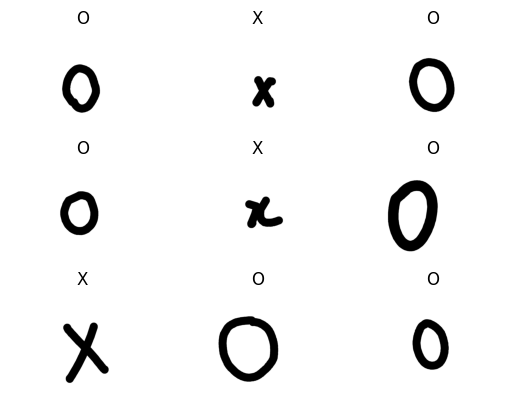

In [ ]:
img_dts = Images_Dataset("xo_dataset")
img_dts.load_images("xo_dataset")
img_dts.get_encoded_images( 90, 120, test_size=0.2)
img_dts.show_images()

#$\color{green}{\textbf{Exercise 8}}$
---

In [ ]:
X_train, X_test, Y_train, Y_test = img_dts.data_set.copy()


223223223223223223223223223223223223223223223223223223223223


In [ ]:

def average_performance( img_size, runs =10,  test=0.2, val=0.1):
    acc_list = []
    img_dts = Images_Dataset("xo_dataset")
    img_dts.load_images("xo_dataset")
    img_dts.get_encoded_images( int(img_size[0]), int(img_size[1]), test_size=0.2)
    X_train, X_test, Y_train, Y_test = img_dts.data_set.copy()
    for run in range(runs):
      cnn = Convolutional_Neural_Network(X_train, Y_train)
    # training process
      cnn.train(LR=0.006, epochs=20)
    # plot error/accuracy history

      loss, accuracy = cnn.model.evaluate(X_test, Y_test, verbose=0)
      acc_list.append(accuracy)
      print("After {} run accuracy is {}".format(run+1, accuracy))
    acc_list = np.array(acc_list)
    return np.mean(acc_list), np.std(acc_list), max(acc_list)

for s in [[180/(2**k),240/(2**k)] for k in range(4)]:

   print("for image size {}, avg accuracy is {}\n max accuracy is ".format(s,*average_performance(s)))
   print("_"*30)


After 1 run accuracy is 0.5909090638160706
After 2 run accuracy is 0.9090909361839294
After 3 run accuracy is 0.5
After 4 run accuracy is 0.9545454382896423
After 5 run accuracy is 0.9545454382896423
After 6 run accuracy is 0.5
After 7 run accuracy is 0.9545454382896423
After 8 run accuracy is 0.8636363744735718
After 9 run accuracy is 0.9090909361839294
After 10 run accuracy is 0.8636363744735718
for image size [180.0, 240.0], avg accuracy is 0.8
 max accuracy is 
______________________________
After 1 run accuracy is 0.7272727489471436
After 2 run accuracy is 0.9545454382896423
After 3 run accuracy is 0.9090909361839294
After 4 run accuracy is 0.6818181872367859
After 5 run accuracy is 0.9090909361839294
After 6 run accuracy is 0.8636363744735718
After 7 run accuracy is 0.5909090638160706
After 8 run accuracy is 0.9545454382896423
After 9 run accuracy is 0.7272727489471436
After 10 run accuracy is 0.7727272510528564
for image size [90.0, 120.0], avg accuracy is 0.8090909123420715
 ma

AS WE MAY OBSERVE HIGHEST ACCURACY Is for size [90,120]

1. Create a $\color{blue}{\text{class}}$ to **load**, **transform**, and **encode** images from a $\color{red}{\text{folder}}$.
```
class Images_Dataset:    
        def __init__(self, folder):
            self.categories = # a list of image categories (e.g., ['O', 'X'])
            self.images = # a dictionary of images

        def load_images(self, folder):
            '''
            Input: The name of a folder that contains subfolders (named after each image category)
            Output: A dictionary of 'key:value' pairs where 'key' is a category and 'value' a list of images,
                    e.g., {'O':[O_img1, O_img2, ...], 'X':[X_img1, X_img2, ...]}
            '''
        def get_encoded_images(self, height, width, test_size=0.2):
            '''
            Encodes every image as a numpy array, change the size,
            convert to 1 channel mode (grayscale) and normalize it (x/255)
            Output: (X_train, X_test, Y_train, Y_test) arrays for training/test
            '''
        def show_images(self):
            '''
            Randomly selects 9 images from different
            categories to display them in a grid
            '''
```
2. Test your code with the $\color{red}{\text{dataset}}$ of two categories (i.e., $[O, X]$) as follows: select (alternatively, you can perform a grid search) an **optimal hyperparameter configuration** (e.g., $\color{green}{\text{LR=0.006}}$ and $\color{green}{\text{epochs=20}}$) and compute the **average performance** ($\color{blue}{\text{mean}}$, $\color{blue}{\text{standard deviation}}$ and $\color{blue}{\text{best}}$ accuracy) for $\color{green}{\text{ten runs}}$ using different image sizes **(height, width)**.
```
average_performance(runs=10, test=0.2, val=0.1, img_size=(180, 240))
```
```
average_performance(runs=10, test=0.2, val=0.1, img_size=(90, 120))
```
```
average_performance(runs=10, test=0.2, val=0.1, img_size=(45, 60))
```
```
average_performance(runs=10, test=0.2, val=0.1, img_size=(22, 30))
```
3. For which $\color{green}{\text{image size}}$ did you get the $\color{red}{\text{best performance}}$?